# YouTube trending videos

In [115]:
import os
from typing import List

import numpy as np
from numpy import nan

# import sys
# sys.path.append('..')
nan
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats

from helpers.files import load_csv, load_csv_file, save_csv
from helpers.json_helper import load_tokenized_text
from ped6.tfidf import add_tfidf_args

numeric_attrs = [
    "views", "likes", "dislikes", "comment_count", "description_len", "title_len", "channel_title_len",
    "publish_time_day_of_week", "publish_time_hour_of_day", "publish_time", "movie_domains_count"
]

bool_attrs = [
    "comments_disabled", "ratings_disabled", "video_error_or_removed"
]

selected_attrs = []

forbidden_attrs = [ "views", "likes", "dislikes", "comment_count"]


## Etap 5 - Powtórzone po przefiltrowaniu danych - Zbieranie danych nie-trending

### Wczytanie danych trending

In [116]:
gb_videos, us_videos = load_csv("ped5_t_filtered")
trending_videos = pd.concat([gb_videos, us_videos], ignore_index=True)

### Wczytanie danych nie trending

In [117]:
gb_non_videos, us_non_videos = load_csv("ped5_nt_filtered")
non_trending_videos = pd.concat([gb_non_videos, us_non_videos], ignore_index=True)
non_trending_videos.rename(columns={"category_id": "new_category_id"}, inplace=True)

### Atrybuty liczbowe

**Funkcja do rysowania wykresów**

In [118]:
def plot_numeric_attr(attr_name: str, trending: pd.DataFrame, non_trending: pd.DataFrame) -> None:
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))
    axes[0, 0].hist(trending[attr_name])
    axes[0, 0].title.set_text(f"Trending: {attr_name}")
    axes[0, 1].hist(non_trending[attr_name])
    axes[0, 1].title.set_text(f"Non Trending: {attr_name}")
    axes[1, 0].boxplot(
        [trending[trending[attr_name].notna()][attr_name], non_trending[attr_name]],
        labels=["Trending", "Non Trending"]
    )
    axes[1, 1].boxplot(
        [trending[trending[attr_name].notna()][attr_name], non_trending[attr_name]],
        labels=["Trending", "Non Trending"],
        showfliers=False
    )

**Views**

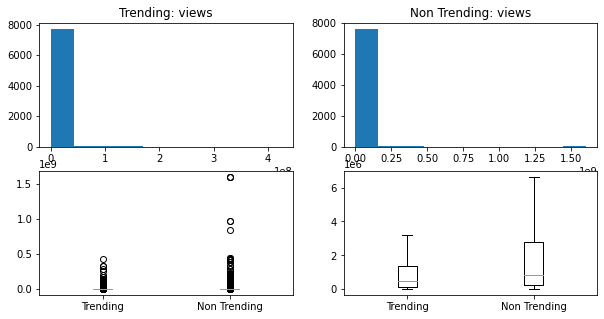

In [119]:
plot_numeric_attr("views", trending_videos, non_trending_videos)

**Likes**

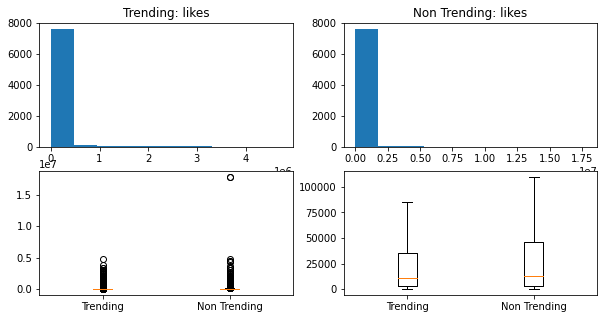

In [120]:
plot_numeric_attr("likes", trending_videos, non_trending_videos)

**Dislikes**

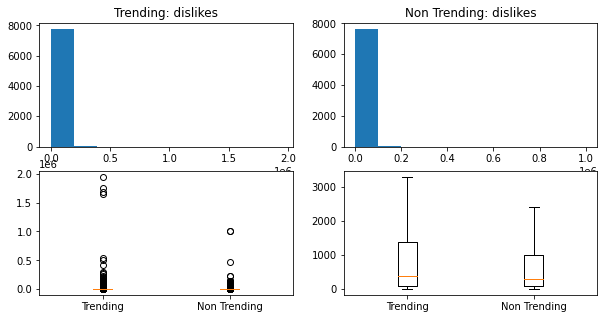

In [121]:
plot_numeric_attr("dislikes", trending_videos, non_trending_videos)

**Comment Count**

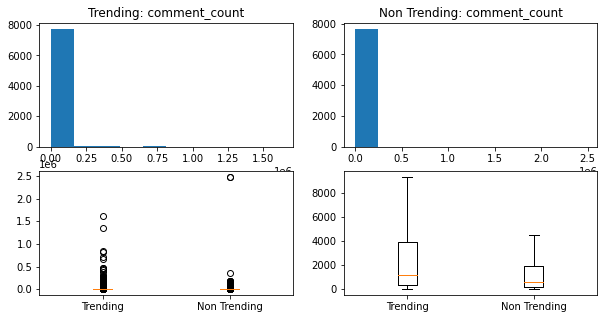

In [122]:
plot_numeric_attr("comment_count", trending_videos, non_trending_videos)

**Description length**

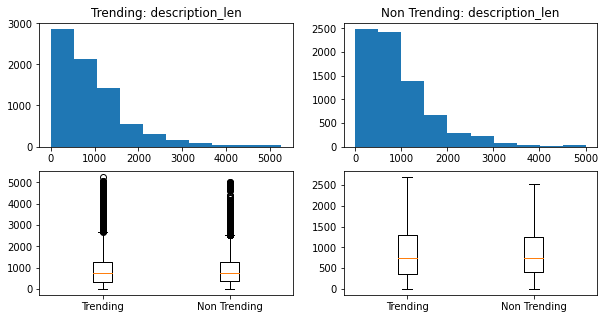

In [123]:
plot_numeric_attr("description_len", trending_videos, non_trending_videos)

**Title length**

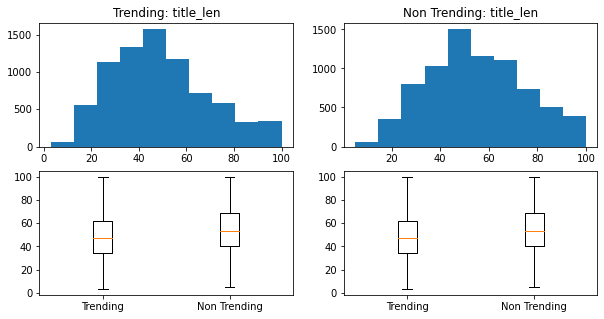

In [124]:
plot_numeric_attr("title_len", trending_videos, non_trending_videos)

**Channel title length**

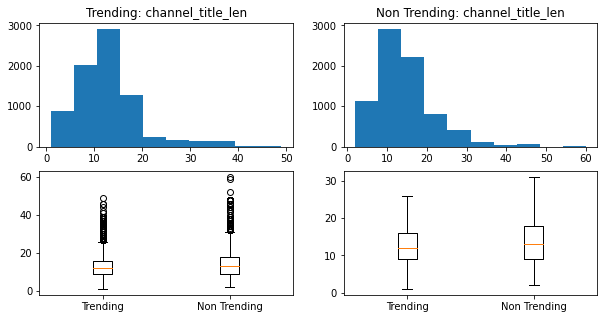

In [125]:
plot_numeric_attr("channel_title_len", trending_videos, non_trending_videos)

**Liczba linków**

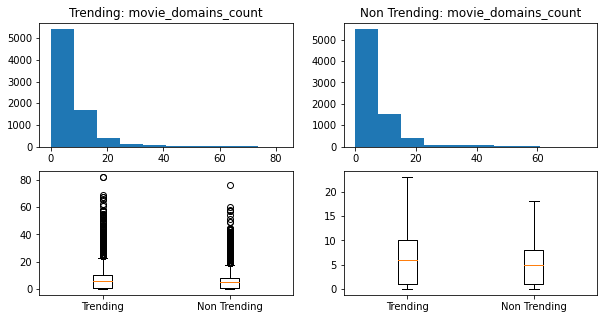

In [126]:
plot_numeric_attr("movie_domains_count", trending_videos, non_trending_videos)

### Atrybuty czasowe

**Dzień opublikowania filmu**

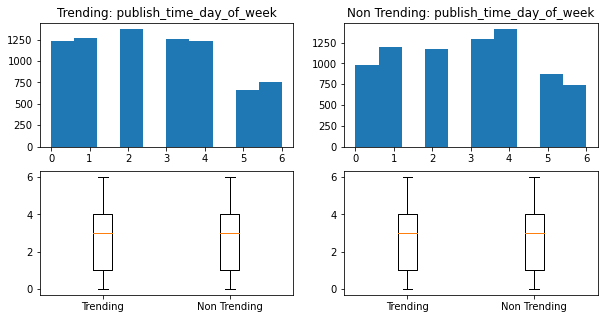

In [127]:
plot_numeric_attr("publish_time_day_of_week", trending_videos, non_trending_videos, )

**Godzina opublikowania filmu**

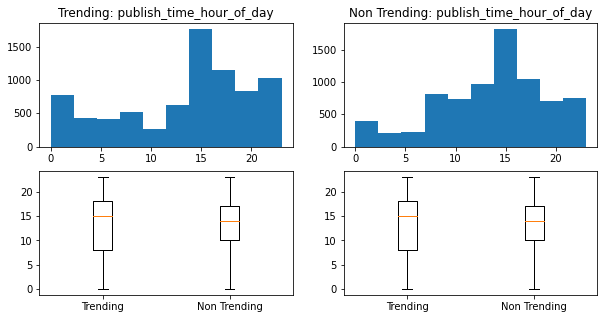

In [128]:
plot_numeric_attr("publish_time_hour_of_day", trending_videos, non_trending_videos)

**Data publikacji**

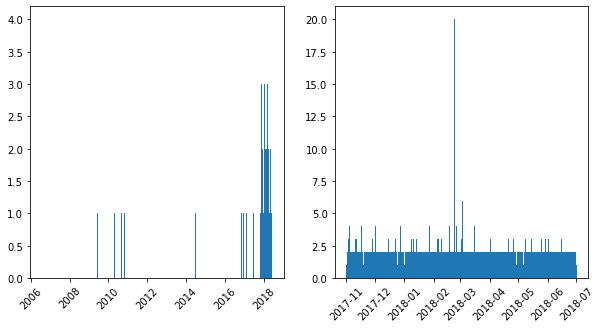

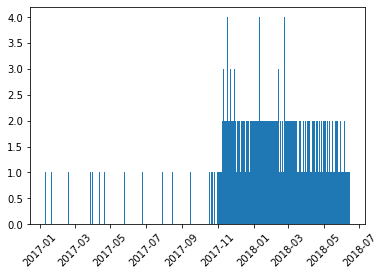

In [129]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

trending_publish_time_counts = pd.to_datetime(trending_videos["publish_time"],
                                              format="%Y-%m-%dT%H:%M:%S.%fZ").value_counts()
trending_publish_time_counts = trending_publish_time_counts.rename_axis("publish_time").reset_index(name="count")

publish_times = pd.to_datetime(trending_videos["publish_time"], format="%Y-%m-%dT%H:%M:%S.%fZ")
filtered = publish_times[publish_times >= "2017-01-01"]
filtered_counts = filtered.value_counts().rename_axis("publish_time").reset_index(name="count")

non_trending_publish_time_counts = pd.to_datetime(non_trending_videos["publish_time"],
                                                  format="%Y-%m-%dT%H:%M:%SZ").value_counts()
non_trending_publish_time_counts = non_trending_publish_time_counts.rename_axis("publish_time").reset_index(
    name="count")

axes[0].bar(pd.to_datetime(trending_publish_time_counts["publish_time"], format="%Y-%m-%dT%H:%M:%S.%fZ"),
            trending_publish_time_counts["count"])
for tick in axes[0].get_xticklabels():
    tick.set_rotation(45)

axes[1].bar(pd.to_datetime(non_trending_publish_time_counts["publish_time"], format="%Y-%m-%dT%H:%M:%SZ"),
            non_trending_publish_time_counts["count"])
for tick in axes[1].get_xticklabels():
    tick.set_rotation(45)
plt.show()

plt.bar(pd.to_datetime(filtered_counts["publish_time"], format="%Y-%m-%dT%H:%M:%S.%fZ"), filtered_counts["count"])
plt.xticks(rotation=45)
plt.show()

### Atrybuty logiczne

**Funkcja do rysowania wykresów**

In [130]:
def plot_bool_attr(attr_name: str) -> None:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    trending_values_counts = trending_videos[attr_name].value_counts().rename_axis("value").reset_index(name="count")
    axes[0].bar(np.arange(len(trending_values_counts)), trending_values_counts["count"])
    axes[0].set_xticks(np.arange(len(trending_values_counts)))
    axes[0].set_xticklabels(["False", "True"][:len(trending_values_counts)])
    axes[0].title.set_text(f"Trending: {attr_name}")
    non_trending_values_counts = non_trending_videos[attr_name].value_counts().rename_axis("value").reset_index(
        name="count")
    axes[1].bar(np.arange(len(non_trending_values_counts)), non_trending_values_counts["count"])
    axes[1].set_xticks(np.arange(len(non_trending_values_counts)))
    axes[1].set_xticklabels(["False", "True"][:len(non_trending_values_counts)])
    axes[1].title.set_text(f"Non Trending: {attr_name}")

**Zablokowanie komentowania - comments disabled**

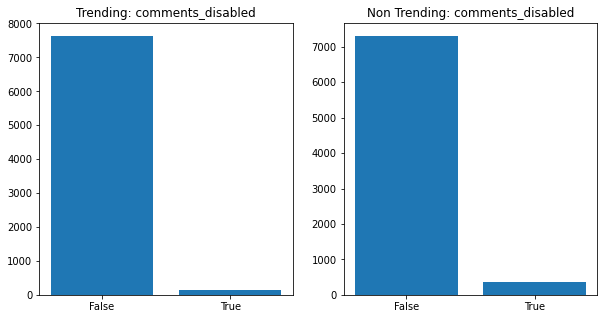

In [131]:
plot_bool_attr("comments_disabled")

**Zablokowanie oceny - ratings disabled**

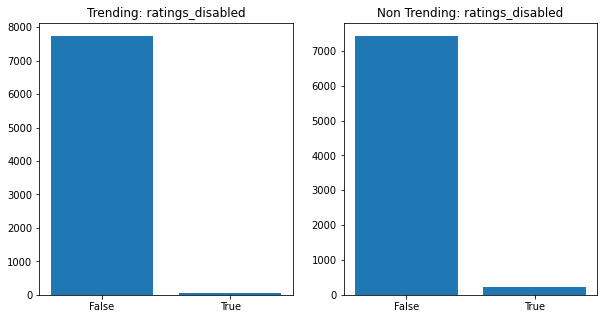

In [132]:
plot_bool_attr("ratings_disabled")

**Błąd filmu lub usunięty - video error or removed**

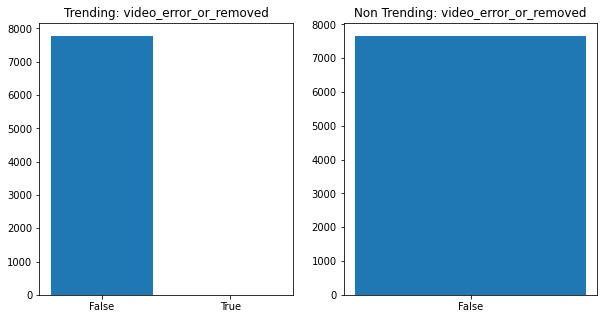

In [133]:
plot_bool_attr("video_error_or_removed")

### Atrybuty tekstowe

**Metoda do wyświetlania wykresów**

In [134]:
def plot_tokenized_stats(attr_name):
    trending_path = os.path.join("ped5_t_filtered", "words")

    gb_words = load_csv_file(os.path.join(trending_path, f"GB_{attr_name}.csv"))
    us_words = load_csv_file(os.path.join(trending_path, f"US_{attr_name}.csv"))
    trending_words = pd.concat([gb_words, us_words])
    trending_values_counts = trending_words.value_counts().rename_axis("words").reset_index(name="count")
    tr_head = trending_values_counts.head(50)

    non_trending_path = os.path.join("ped5_nt_filtered", "words")

    gb_non_words = load_csv_file(os.path.join(non_trending_path, f"GB_{attr_name}.csv"))
    us_non_words = load_csv_file(os.path.join(non_trending_path, f"US_{attr_name}.csv"))
    non_trending_words = pd.concat([gb_non_words, us_non_words])
    non_trending_values_counts = non_trending_words.value_counts().rename_axis("words").reset_index(name="count")
    non_tr_head = non_trending_values_counts.head(50)

    plt.subplots(figsize=(18, 5))
    plt.bar(tr_head["words"], tr_head["count"])
    plt.title("Trending")
    plt.xticks(rotation=270, fontsize=15)
    plt.show()

    plt.subplots(figsize=(18, 5))
    plt.bar(non_tr_head["words"], non_tr_head["count"])
    plt.title("Non Trending")
    plt.xticks(rotation=270, fontsize=15)
    plt.show()

**Tytuły kanałów - channel_title**

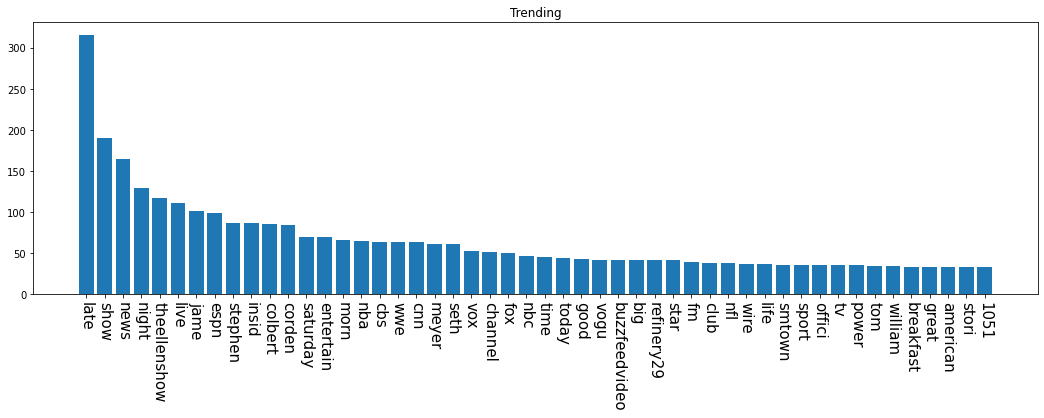

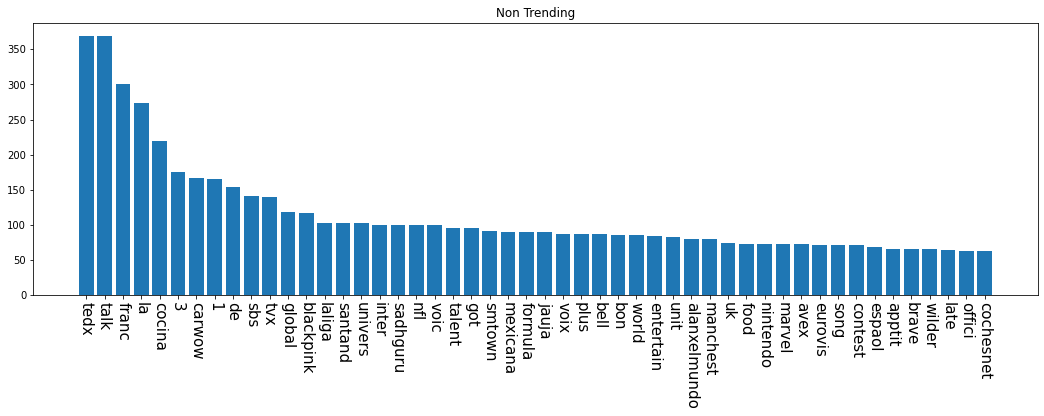

In [135]:
plot_tokenized_stats("channel_title")

**Tytuły filmów - title**

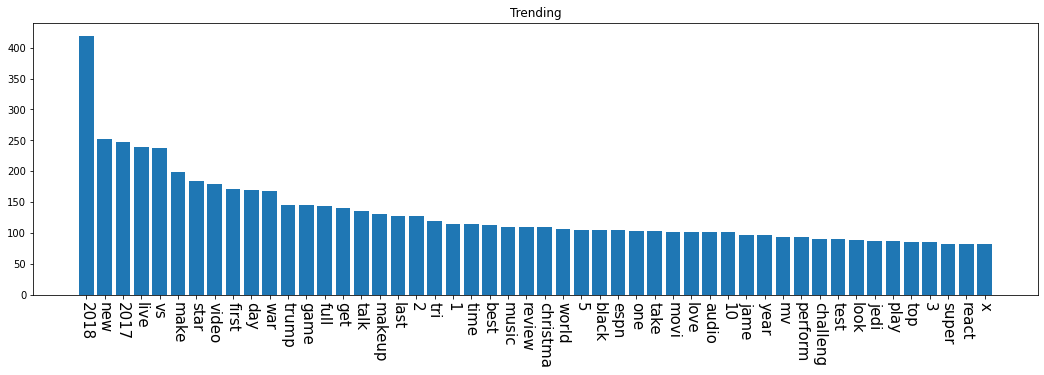

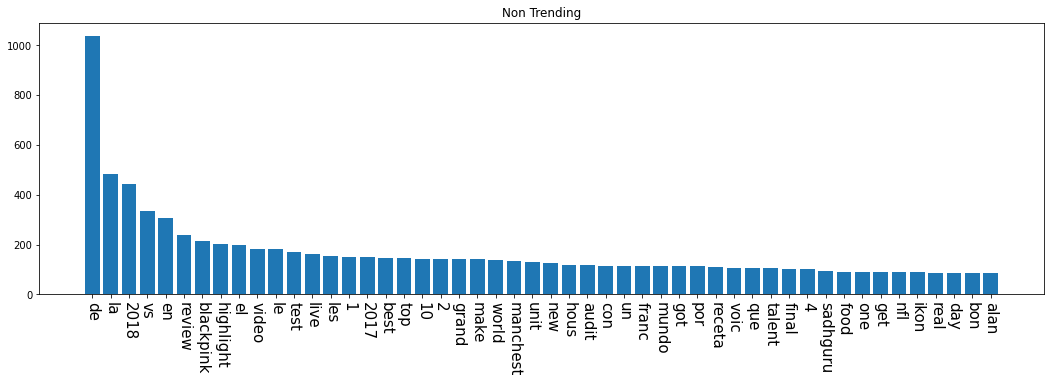

In [136]:
plot_tokenized_stats("title")

**Opisy filmów - description**

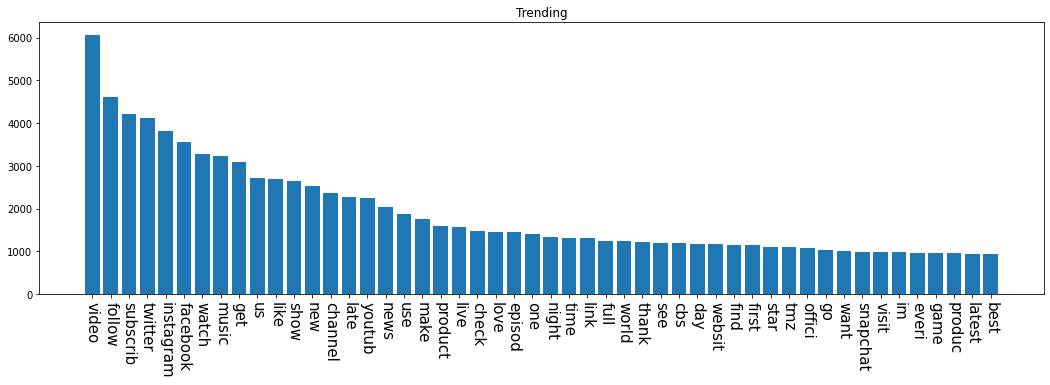

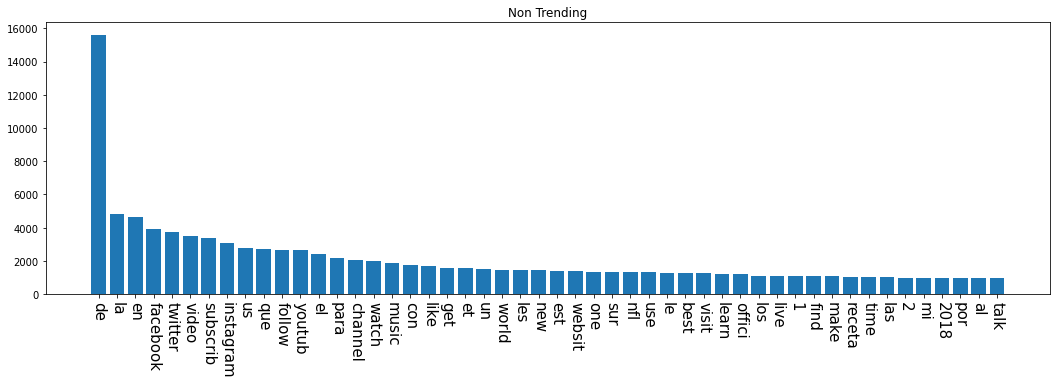

In [137]:
plot_tokenized_stats("description")

**Domeny**

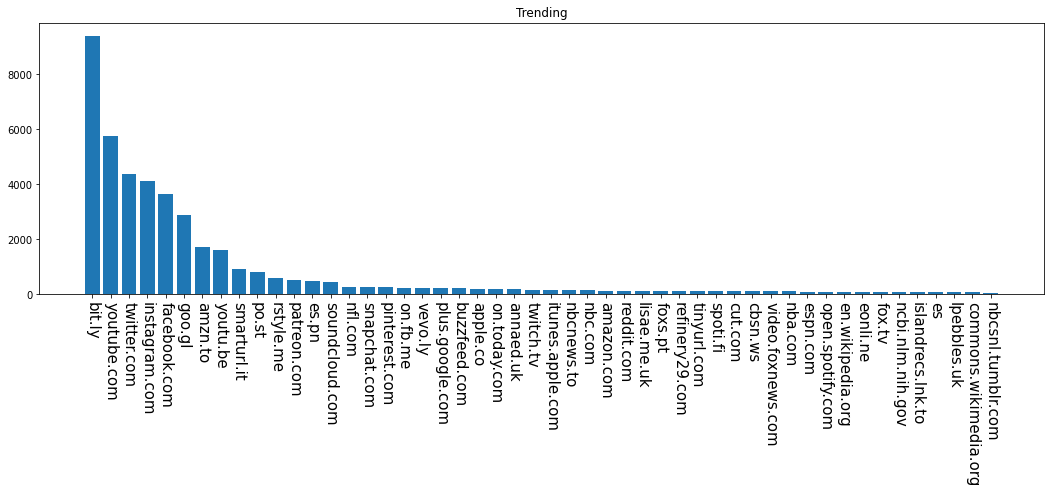

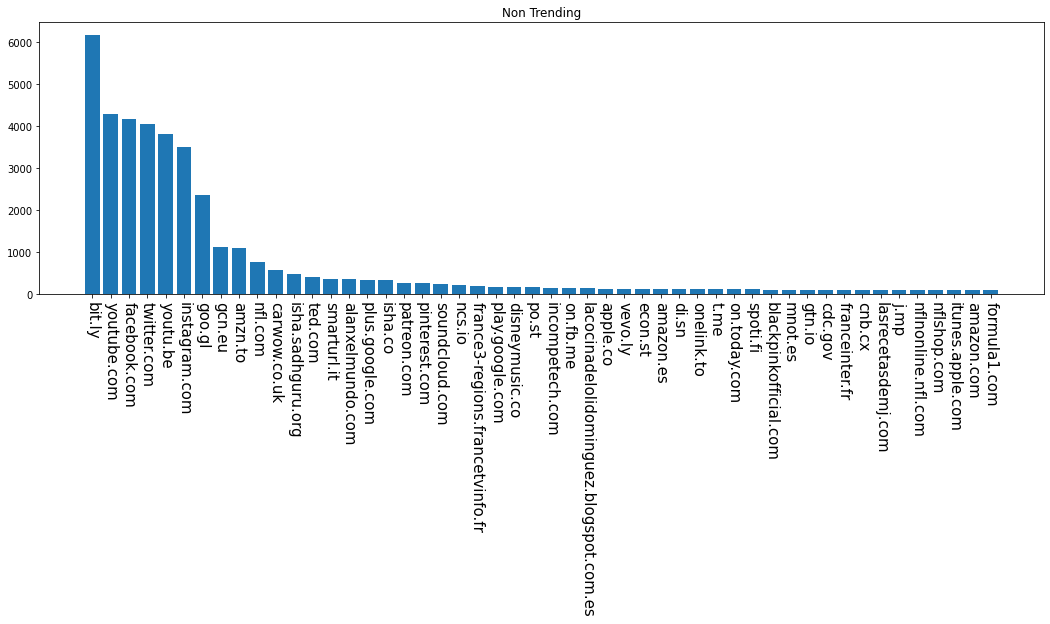

In [138]:
plot_tokenized_stats("domain")

**Tagi**

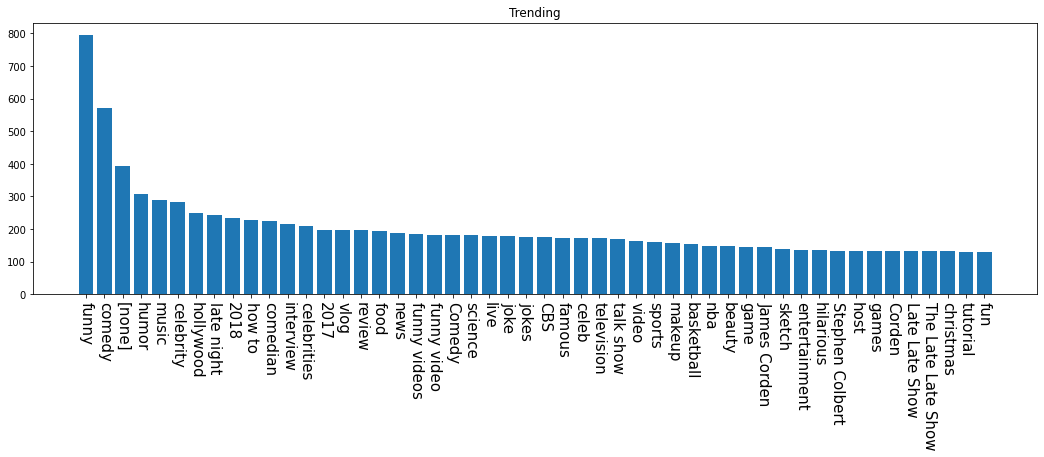

c:\users\dominik\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\dominik\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47932 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\dominik\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45453 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\dominik\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\dominik\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50528 missing from current font.
  font.

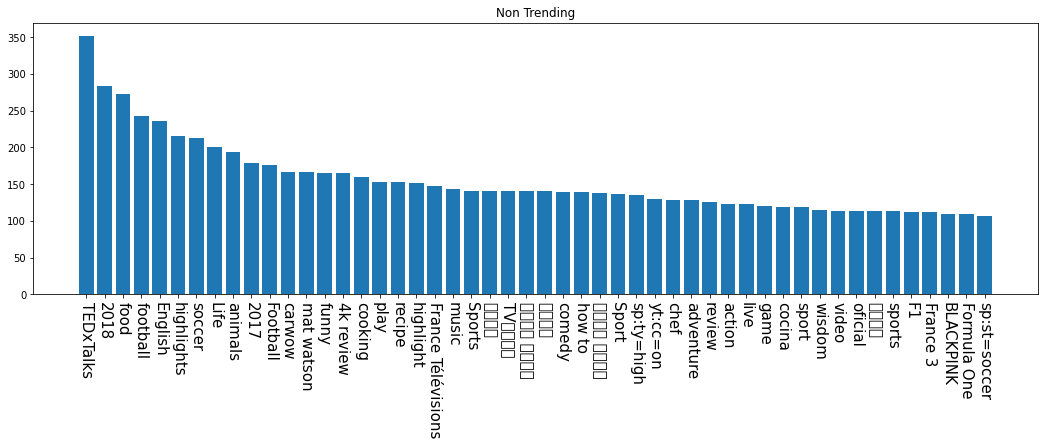

In [139]:
def prepare_tags(tags):
    tags.index = tags.index.droplevel(-1)
    tags.name = "tags"
    tags = tags.to_frame()
    tags_counts = tags.value_counts()
    tags_counts = tags_counts.rename_axis("tag").reset_index(name="count")
    return tags_counts


non_trending_tags = non_trending_videos["tags"].str.split("|").apply(pd.Series, 1).stack()
trending_tags = trending_videos["tags"].str.split("|").apply(pd.Series, 1).stack()

non_trending_tags = prepare_tags(non_trending_tags)
trending_tags = prepare_tags(trending_tags)

plt.subplots(figsize=(18, 5))
plt.bar(trending_tags["tag"].head(50), trending_tags["count"].head(50))
plt.title("Trending")
plt.xticks(rotation=270, fontsize=15)
plt.show()

plt.subplots(figsize=(18, 5))
plt.bar(non_trending_tags["tag"].head(50), non_trending_tags["count"].head(50))
plt.title("Non Trending")
plt.xticks(rotation=270, fontsize=15)
plt.show()

## Ocena atrybutów


### Atrybuty numeryczne

Korelacja atrybutów liczbowych z klasą decyzyjną trending czy nietrending

Atrybuty numeryczne zostały ocenione za pomocą analizy wariancji (ANOVA Analysis of Variance).
Zastosowana metoda wynika z tego, że mamy jednym z atrybutów jest atrybut
nominalny - klasę decyzyjną trending vs non trending.

Przyjęte hipotezy:

$$ H_0 $$: Średnie w poszczególnych grupach są takie same.

$$ H_1 $$: Średnie w poszczególnych grupach są różne.


Przyjęty poziom istotności: $$ \alpha = 0.05 $$

In [140]:
gb_videos, us_videos = load_csv("ped5_t_filtered")
trending_videos = pd.concat([gb_videos, us_videos], ignore_index=True)

gb_non_videos, us_non_videos = load_csv("ped5_nt_filtered")
non_trending_videos = pd.concat([gb_non_videos, us_non_videos], ignore_index=True)
non_trending_videos.rename(columns={"category_id": "new_category_id"}, inplace=True)
print(len(gb_non_videos))


numeric_attrs = [
    "views", "likes", "dislikes", "comment_count", "description_len", "title_len", "channel_title_len",
    "publish_time_day_of_week", "publish_time_hour_of_day"
]


def anova(data: List[pd.DataFrame], attr: str, show_plots: bool = True):
    data_set = list(map(lambda x: x[attr].dropna(), data))
    f_score, p_value = stats.f_oneway(
        *data_set
    )
    print(f"{attr}: f_score = {f_score} p_value = {p_value}")
    if show_plots:
        plt.title(attr)
        plt.boxplot(data_set, showfliers=False)
        labels = ["Trending", "Non Trending"]
        plt.xticks(np.arange(1, len(labels) + 1), labels, rotation=270, fontsize=15)
        plt.show()
    return f_score, p_value



3896


views: f_score = 49.931580706686496 p_value = 1.6600996091860317e-12


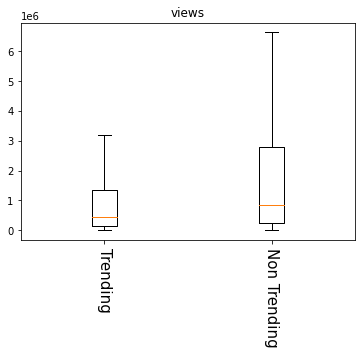

likes: f_score = 5.711983345785878 p_value = 0.01686140842468633


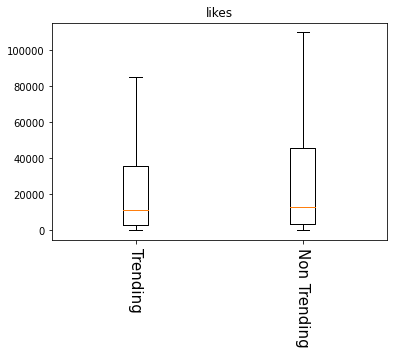

dislikes: f_score = 7.958703014955143 p_value = 0.004791775663047126


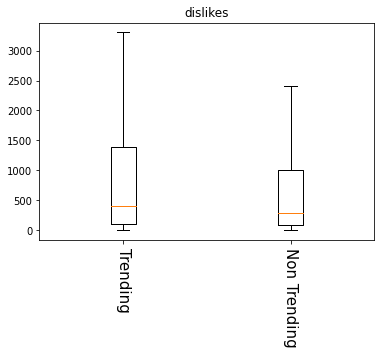

comment_count: f_score = 22.080632072772282 p_value = 2.636891995368929e-06


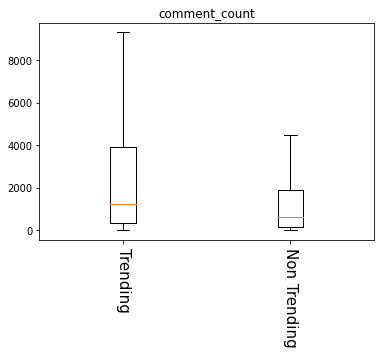

description_len: f_score = 0.00021735694507596983 p_value = 0.9882373821244842


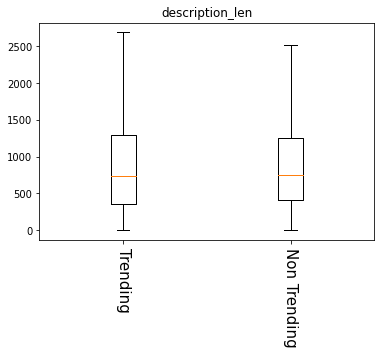

title_len: f_score = 281.94678657440306 p_value = 1.0174201139564289e-62


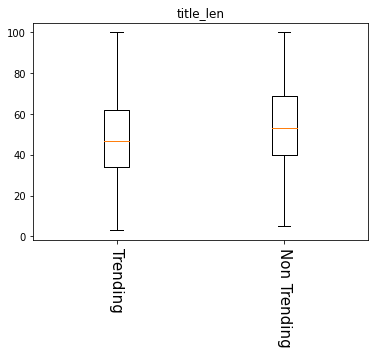

channel_title_len: f_score = 134.02742319749376 p_value = 7.226388274576484e-31


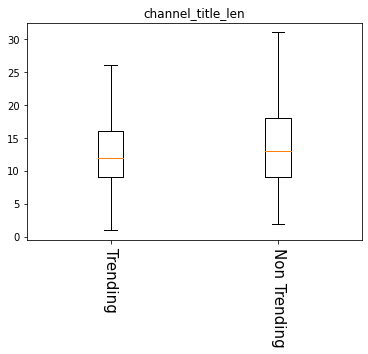

publish_time_day_of_week: f_score = 53.129783155706065 p_value = 3.2734479741703674e-13


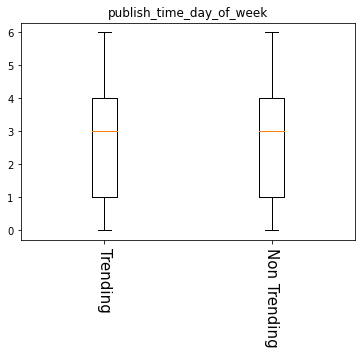

publish_time_hour_of_day: f_score = 4.613027989471393 p_value = 0.031745471421771726


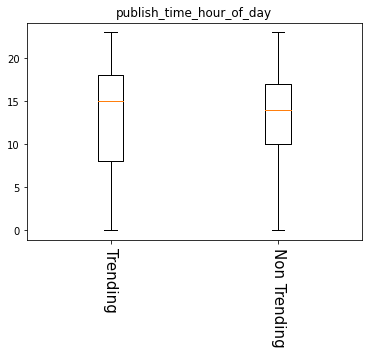

,attr,f score,p value,leq alpha
0,views,49.931581,1.660100e-12,True
1,likes,5.711983,1.686141e-02,True
2,dislikes,7.958703,4.791776e-03,True
3,comment_count,22.080632,2.636892e-06,True
4,description_len,0.000217,9.882374e-01,False
5,title_len,281.946787,1.017420e-62,True
6,channel_title_len,134.027423,7.226388e-31,True
7,publish_time_day_of_week,53.129783,3.273448e-13,True
8,publish_time_hour_of_day,4.613028,3.174547e-02,True


In [141]:
data_set = [trending_videos, non_trending_videos]

f_scores = pd.DataFrame()
alpha = 0.05
for i in numeric_attrs:
    f, p = anova(data_set, i)
    f_scores = f_scores.append(pd.DataFrame(
        data={"attr": [i], "f score": [f], "p value": [p], "leq alpha": [p <= alpha]}
    ), ignore_index=True)
    if p <= alpha and i not in forbidden_attrs:
        selected_attrs.append(i)
f_scores

### Atrybuty liczbowe wyekstrahowane z cech obrazków

Liczone są analogicznie jak poprzednich etapach. Najpierw wczytywane są już przeliczone dane, a następnie za pomocą anovy liczona jest istotność statystyczna.

In [142]:
images_data_cols = ["gray_mean_score", "color_mean_score", "gray_hist_score", "red_hist_score", "green_hist_score",
                    "blue_hist_score",
                    "edges_score", "entropy_score"]

non_trending_videos_img = load_csv("images_data_non_trending")[0]

for col in images_data_cols:
    non_trending_videos[col] = non_trending_videos_img[col].reset_index(drop=True)
list(non_trending_videos.columns)
list(trending_videos.columns)

['new_video_id',
 'video_id',
 'title',
 'channel_title',
 'category_id',
 'publish_time',
 'tags',
 'views',
 'likes',
 'dislikes',
 'comment_count',
 'thumbnail_link',
 'comments_disabled',
 'ratings_disabled',
 'video_error_or_removed',
 'description',
 'description_len',
 'title_len',
 'channel_title_len',
 'publish_time_day_of_week',
 'publish_time_hour_of_day',
 'movie_domains_count',
 'gray_mean_score',
 'color_mean_score',
 'gray_hist_score',
 'red_hist_score',
 'green_hist_score',
 'blue_hist_score',
 'edges_score',
 'entropy_score']

gray_mean_score: f_score = 26.06587440993009 p_value = 3.339025768554801e-07


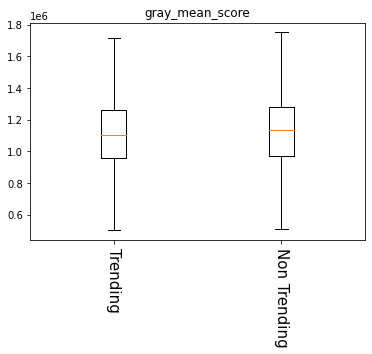

color_mean_score: f_score = 23.156964117120125 p_value = 1.5071853343720822e-06


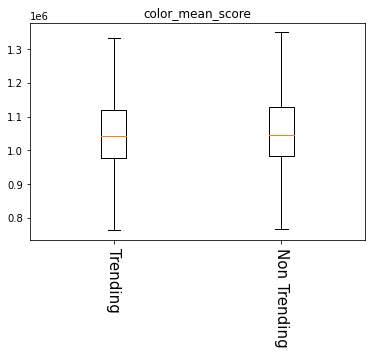

gray_hist_score: f_score = 0.47914952702604174 p_value = 0.48881824671619845


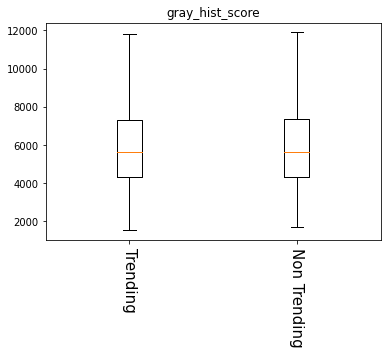

red_hist_score: f_score = 2.6540746356514777 p_value = 0.1033053229007191


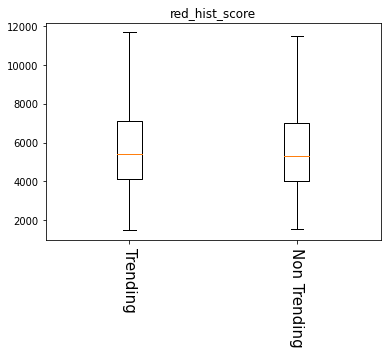

green_hist_score: f_score = 0.7886081440427124 p_value = 0.3745352088694761


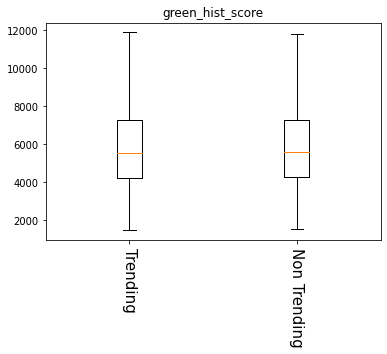

blue_hist_score: f_score = 0.040583166506918664 p_value = 0.8403473209781342


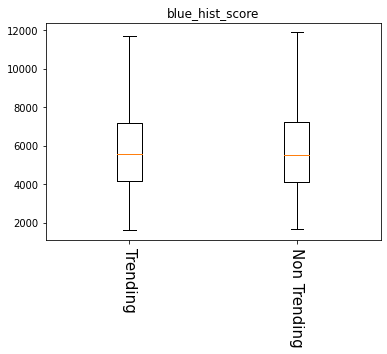

edges_score: f_score = 25.65846392020055 p_value = 4.1222108399050496e-07


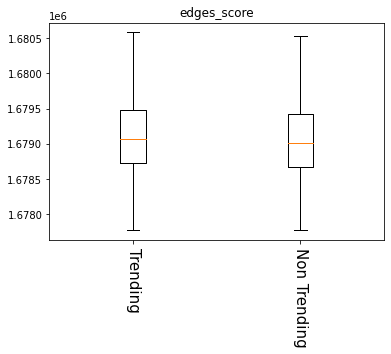

entropy_score: f_score = 5.589703222362048 p_value = 0.01807870665480473


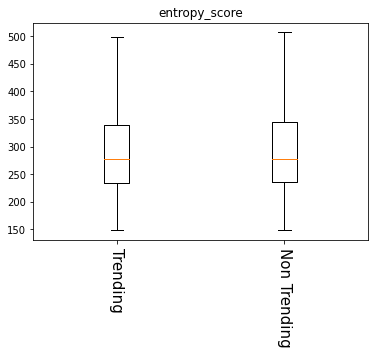

,attr,f score,p value,leq alpha
0,gray_mean_score,26.065874,3.339026e-07,True
1,color_mean_score,23.156964,1.507185e-06,True
2,gray_hist_score,0.479150,4.888182e-01,False
3,red_hist_score,2.654075,1.033053e-01,False
4,green_hist_score,0.788608,3.745352e-01,False
5,blue_hist_score,0.040583,8.403473e-01,False
6,edges_score,25.658464,4.122211e-07,True
7,entropy_score,5.589703,1.807871e-02,True


In [143]:
data_set = [trending_videos, non_trending_videos_img]

f_scores_img = pd.DataFrame()
alpha = 0.05
for i in images_data_cols:
    f, p = anova(data_set, i)
    f_scores_img = f_scores_img.append(pd.DataFrame(
        data={"attr": [i], "f score": [f], "p value": [p], "leq alpha": [p <= alpha]}
    ), ignore_index=True)
    if p <= alpha and i not in forbidden_attrs:
        selected_attrs.append(i)
f_scores_img

Spośród atrybutów z obrazków, można zauważyć, że okoła połowa z nich może okazać się pomocna w klasyfkacji do podziału trending/non_trending, gdzie najbardziej istotny zdaje się być informacja o krawędziach, co można częściowo interpretować jako liczbę różnych obiektów na obrazku

### Ocena atrybutów tekstowych

W przypadku atrybutów tekstowych zdecydowaliśmy się użyć reprezentacji TF-IDF

In [144]:
n_features = 20

**Tytuły - title**

In [145]:
title_tfidf, f_names = add_tfidf_args("title", n_features)
trending_tfidf = title_tfidf[:len(trending_videos)]
non_trending_tfidf = title_tfidf[len(trending_videos):].reset_index(drop=True)
for i, name in enumerate(f_names):
    trending_videos[f"title_tfidf_{name}"] = trending_tfidf[i]
    non_trending_videos[f"title_tfidf_{name}"] = non_trending_tfidf[i]

f_scores = pd.DataFrame()
for i in range(n_features):
    data_set = [trending_tfidf[i], non_trending_tfidf[i]]
    f_score, p_value = stats.f_oneway(
        *data_set
    )
    f_scores = f_scores.append(pd.DataFrame(
        data={"attr": [f_names[i]], "f score": [f_score], "p value": [p_value], "leq alpha": [p_value <= alpha]}
    ), ignore_index=True)
    if p_value <= alpha and i not in forbidden_attrs:
        selected_attrs.append(f"title_tfidf_{f_names[i]}")
f_scores

,attr,f score,p value,leq alpha
0,10,8.944446,2.787534e-03,True
1,2017,28.071288,1.185333e-07,True
2,2018,0.123911,7.248353e-01,False
3,best,3.628828,5.680536e-02,False
4,day,24.680265,6.839730e-07,True
5,de,825.309421,7.341239e-177,True
6,en,273.148785,7.779368e-61,True
7,highlight,55.597544,9.365413e-14,True
8,la,332.775481,1.414237e-73,True
9,live,10.419829,1.249297e-03,True


**Tytuły kanałów - channel_title**

In [146]:
channel_title_tfidf, f_names = add_tfidf_args("channel_title", n_features)
trending_tfidf = channel_title_tfidf[:len(trending_videos)]
non_trending_tfidf = channel_title_tfidf[len(trending_videos):].reset_index(drop=True)

for i, name in enumerate(f_names):
    trending_videos[f"channel_title_tfidf_{name}"] = trending_tfidf[i]
    non_trending_videos[f"channel_title_tfidf_{name}"] = non_trending_tfidf[i]


f_scores = pd.DataFrame()
for i in range(n_features):
    data_set = [trending_tfidf[i], non_trending_tfidf[i]]
    f_score, p_value = stats.f_oneway(
        *data_set
    )
    f_scores = f_scores.append(pd.DataFrame(
        data={"attr": [f_names[i]], "f score": [f_score], "p value": [p_value], "leq alpha": [p_value <= alpha]}
    ), ignore_index=True)
    if p_value <= alpha and i not in forbidden_attrs:
        selected_attrs.append(f"channel_title_tfidf_{f_names[i]}")
f_scores

,attr,f score,p value,leq alpha
0,carwow,172.401477,3.585269e-39,True
1,cocina,216.926148,9.072072e-49,True
2,de,147.920082,7.055552e-34,True
3,entertain,1.808330,1.787285e-01,False
4,franc,316.123186,5.046162e-70,True
5,global,109.065700,1.908325e-25,True
6,jame,41.058644,1.520091e-10,True
7,la,251.275296,3.793961e-56,True
8,late,132.977065,1.221006e-30,True
9,live,49.262330,2.332426e-12,True


**Opisy - description**

In [147]:
description_tfidf, f_names = add_tfidf_args("description", n_features)
trending_tfidf = description_tfidf[:len(trending_videos)]
non_trending_tfidf = description_tfidf[len(trending_videos):].reset_index(drop=True)

for i, name in enumerate(f_names):
    trending_videos[f"description_tfidf_{name}"] = trending_tfidf[i]
    non_trending_videos[f"description_tfidf_{name}"] = non_trending_tfidf[i]


f_scores = pd.DataFrame()
for i in range(n_features):
    data_set = [trending_tfidf[i], non_trending_tfidf[i]]
    f_score, p_value = stats.f_oneway(
        *data_set
    )
    f_scores = f_scores.append(pd.DataFrame(
        data={"attr": [f_names[i]], "f score": [f_score], "p value": [p_value], "leq alpha": [p_value <= alpha]}
    ), ignore_index=True)
    if p_value <= alpha and i not in forbidden_attrs:
        selected_attrs.append(f"description_tfidf_{f_names[i]}")
f_scores

,attr,f score,p value,leq alpha
0,be,0.010396,9.187902e-01,False
1,bit,31.132721,2.450243e-08,True
2,channel,17.092290,3.579465e-05,True
3,com,7.650474,5.682485e-03,True
4,de,2204.101621,0.000000e+00,True
5,facebook,37.740128,8.280692e-10,True
6,follow,201.182428,2.221966e-45,True
7,http,198.321658,9.184432e-45,True
8,https,101.502536,8.454105e-24,True
9,instagram,85.211827,3.021874e-20,True


**Tagi - tags**

In [148]:
tags_tfidf, f_names = add_tfidf_args("tags", n_features)
trending_tfidf = tags_tfidf[:len(trending_videos)]
non_trending_tfidf = tags_tfidf[len(trending_videos):].reset_index(drop=True)

for i, name in enumerate(f_names):
    trending_videos[f"tags_tfidf_{name}"] = trending_tfidf[i]
    non_trending_videos[f"tags_tfidf_{name}"] = non_trending_tfidf[i]

f_scores = pd.DataFrame()
for i in range(n_features):
    data_set = [trending_tfidf[i], non_trending_tfidf[i]]
    f_score, p_value = stats.f_oneway(
        *data_set
    )
    f_scores = f_scores.append(pd.DataFrame(
        data={"attr": [f_names[i]], "f score": [f_score], "p value": [p_value], "leq alpha": [p_value <= alpha]}
    ), ignore_index=True)
    if p_value <= alpha and i not in forbidden_attrs:
        selected_attrs.append(f"tags_tfidf_{f_names[i]}")
f_scores


,attr,f score,p value,leq alpha
0,2017,29.584306,5.435096e-08,True
1,2018,81.609138,1.851419e-19,True
2,anim,37.343772,1.014154e-09,True
3,best,6.341576,1.180403e-02,True
4,de,719.447966,6.118766e-155,True
5,food,11.365205,7.501631e-04,True
6,funni,289.820648,2.103586e-64,True
7,game,42.290665,8.108372e-11,True
8,late,127.816528,1.608150e-29,True
9,live,76.977391,1.907476e-18,True


### Zapisanie danych

In [149]:
# gb_videos, us_videos = load_csv("ped3_data")
# trending_videos = pd.concat([gb_videos, us_videos])
#
# for name in numeric_attrs:
#     trending_videos[name] = trending_videos[name].apply(lambda x: eval(x)[-1] if eval(x) else np.nan)
# trending_videos["tags"] = trending_videos["tags"].apply(lambda x: eval(x)[-1] if eval(x) else np.nan)
#
# for name in bool_attrs:
#     trending_videos[name] = trending_videos[name].apply(lambda x: eval(x)[-1] if eval(x) else np.nan)
#
# gb_non_videos, us_non_videos = load_csv("ped5_non_trending")
# non_trending_videos = pd.concat([gb_non_videos, us_non_videos])
# non_trending_videos.rename(columns={"category_id": "new_category_id"}, inplace=True)

print(selected_attrs)
trending_videos = trending_videos[selected_attrs].copy().reset_index(drop=True)
non_trending_videos = non_trending_videos[selected_attrs].copy().reset_index(drop=True)
trending_videos["trending"] = 1
non_trending_videos["trending"] = 0
print(len(non_trending_videos))

new_videos = pd.concat([trending_videos, non_trending_videos], ignore_index=True).reset_index(drop=True)
print(len(new_videos))
save_csv("ped6_filtered_data", [new_videos], ["videos"])

['title_len', 'channel_title_len', 'publish_time_day_of_week', 'publish_time_hour_of_day', 'gray_mean_score', 'color_mean_score', 'edges_score', 'entropy_score', 'title_tfidf_10', 'title_tfidf_2017', 'title_tfidf_day', 'title_tfidf_de', 'title_tfidf_en', 'title_tfidf_highlight', 'title_tfidf_la', 'title_tfidf_live', 'title_tfidf_make', 'title_tfidf_new', 'title_tfidf_review', 'title_tfidf_star', 'title_tfidf_test', 'title_tfidf_top', 'title_tfidf_war', 'channel_title_tfidf_carwow', 'channel_title_tfidf_cocina', 'channel_title_tfidf_de', 'channel_title_tfidf_franc', 'channel_title_tfidf_global', 'channel_title_tfidf_jame', 'channel_title_tfidf_la', 'channel_title_tfidf_late', 'channel_title_tfidf_live', 'channel_title_tfidf_news', 'channel_title_tfidf_nfl', 'channel_title_tfidf_night', 'channel_title_tfidf_sbs', 'channel_title_tfidf_show', 'channel_title_tfidf_smtown', 'channel_title_tfidf_talk', 'channel_title_tfidf_tedx', 'channel_title_tfidf_tvx', 'channel_title_tfidf_voic', 'descrip